In [1]:
from __future__ import print_function
from Snake.Game import Game

import numpy as np
import neat
import pickle
import copy
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc, cm
import warnings
import graphviz
rc('animation', html='html5')
%matplotlib nbagg

In [2]:
game = Game(35, 35)

In [3]:
cmap = colors.ListedColormap(['white', 'red', 'green', '#cb7341'])
boundaries = [-.9, -0.75, 0.5, .9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

<IPython.core.display.Javascript object>


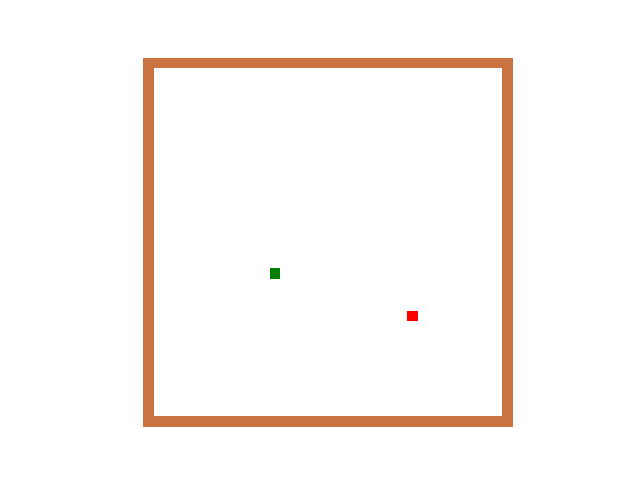

In [4]:
plt.imshow(game.map, cmap=cmap, interpolation='nearest', animated=True, extent=(0,game.h,0,game.w))
plt.axis("off")
plt.show()

In [5]:
def dir_from_float(flt):
    if flt < -.3:
        return 2
    if flt > 0.3:
        return 1
    return 0

In [6]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.RecurrentNetwork.create(genome, config)
        GAME = Game(20, 20)
        genome.fitness = 0

        while GAME.snake:
            prediction = net.activate(GAME.sniff())[0]
            direction = dir_from_float(prediction)
            GAME.step(direction)
            
        genome.fitness = math.sqrt(2**GAME.eaten * GAME.steps )

In [8]:
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     "config")

In [9]:
def run(conf, n_gens=300):

    p = neat.Population(config)

    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    winner = p.run(eval_genomes, n_gens)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    return winner, p, stats

In [11]:
winner, pop, stats = run("config")


 ****** Running generation 0 ****** 

Population's average fitness: 9.27183 stdev: 5.91997
Best fitness: 28.28427 - size: (3, 29) - species 25 - id 25
Average adjusted fitness: 0.303
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     2     14.1    0.482     0
     2    0     2     14.1    0.482     0
     3    0     2      4.1    0.114     0
     4    0     2      5.8    0.177     0
     5    0     2     14.1    0.482     0
     6    0     2      4.5    0.127     0
     7    0     2     14.1    0.482     0
     8    0     2      3.7    0.100     0
     9    0     2     14.1    0.482     0
    10    0     2     14.1    0.482     0
    11    0     2      3.7    0.100     0
    12    0     2      3.6    0.095     0
    13    0     2      3.7    0.100     0
    14    0     2      1.4    0.015     0
    15    0     2      2.0    0.037     0
    

Population's average fitness: 9.02378 stdev: 5.92789
Best fitness: 48.98979 - size: (3, 28) - species 524 - id 1738
Average adjusted fitness: 0.167
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1     2     14.1    0.141     1
     2    1     2     14.1    0.141     1
     3    1     2     14.1    0.141     0
     4    1     2     14.1    0.161     0
     5    1     2     14.1    0.274     1
     6    1     2      6.0    0.083     0
     7    1     2     14.1    0.274     1
     8    1     2     14.1    0.187     0
     9    1     2     14.1    0.141     1
    10    1     2      3.7    0.046     1
    11    1     2      3.7    0.054     1
    12    1     2      1.4    0.009     1
    13    1     2      4.0    0.058     0
    14    1     2     14.1    0.274     0
    15    1     2     28.3    0.311     0
    16    1     2      4.1    0.065     

Population's average fitness: 9.01243 stdev: 5.88142
Best fitness: 28.28427 - size: (3, 29) - species 700 - id 700
Average adjusted fitness: 0.294
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2     2     28.3    0.741     0
     2    2     2     14.1    0.482     2
     3    2     2     14.1    0.482     1
     4    2     2     14.1    0.293     1
     5    2     2     14.1    0.482     2
     6    2     2      3.7    0.098     1
     7    2     2     14.1    0.248     2
     8    2     2     14.1    0.482     1
     9    2     2     14.1    0.248     2
    10    2     2      6.3    0.157     2
    11    2     2      4.2    0.119     0
    12    2     2     14.1    0.248     0
    13    2     2      4.1    0.105     0
    14    2     2     14.1    0.482     1
    15    2     2      1.7    0.027     1
    16    2     2      4.2    0.117     0

Population's average fitness: 9.13464 stdev: 5.82361
Best fitness: 48.98979 - size: (3, 29) - species 873 - id 873
Average adjusted fitness: 0.170
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3     2     14.1    0.141     1
     2    3     2     14.1    0.141     3
     3    3     2     14.1    0.274     2
     4    3     2     14.1    0.274     2
     5    3     2     14.1    0.274     3
     6    3     2      5.5    0.078     2
     7    3     2     14.1    0.141     3
     8    3     2     14.1    0.154     2
     9    3     2     14.1    0.274     3
    10    3     2      4.1    0.052     3
    11    3     2      4.2    0.064     1
    12    3     2     14.1    0.141     1
    13    3     2      4.1    0.064     1
    14    3     2     14.1    0.274     2
    15    3     2      4.2    0.044     2
    16    3     2      4.0    0.057     1

Population's average fitness: 9.16025 stdev: 5.82381
Best fitness: 48.98979 - size: (3, 29) - species 787 - id 787
Average adjusted fitness: 0.170
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4     2     14.1    0.274     2
     2    4     2      2.4    0.026     4
     3    4     2     14.1    0.274     3
     4    4     2      3.0    0.031     3
     5    4     2     14.1    0.141     4
     6    4     2      4.0    0.060     3
     7    4     2     14.1    0.141     4
     8    4     2      3.5    0.030     3
     9    4     2     14.1    0.141     4
    10    4     2     14.1    0.168     4
    11    4     2      4.1    0.062     2
    12    4     2     14.1    0.147     2
    13    4     2      4.2    0.061     0
    14    4     2     14.1    0.274     3
    15    4     2     28.3    0.295     3
    16    4     2      4.2    0.062     2

   947    4     2      4.2    0.059     3
   948    4     2     14.1    0.274     4
   949    4     2      4.1    0.060     4
   950    4     2      4.1    0.064     1
   951    4     2     14.1    0.158     3
   952    4     2     14.1    0.274     2
   953    4     2      4.0    0.044     3
   954    4     2     14.1    0.274     4
   955    4     2     14.1    0.171     0
   956    4     2     14.1    0.163     3
   957    4     2     14.1    0.274     4
   958    4     2     14.1    0.274     4
   959    4     2      3.5    0.030     2
   960    4     2      4.0    0.058     3
   961    4     2     14.1    0.274     4
   962    4     2     14.1    0.169     4
   963    4     2     14.1    0.274     4
   964    4     2     14.1    0.141     3
   965    4     2     14.1    0.174     4
   966    4     2     14.1    0.274     4
   967    4     2      4.2    0.058     4
   968    4     2      4.2    0.065     2
   969    4     2     14.1    0.274     4
   970    4     2      4.2    0.06

Population's average fitness: 9.19735 stdev: 6.29525
Best fitness: 80.00000 - size: (2, 14) - species 822 - id 1895
Average adjusted fitness: 0.104
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6     2     14.1    0.166     4
     2    6     2     14.1    0.086     1
     3    6     2     14.1    0.166     5
     4    6     2     14.1    0.094     5
     5    6     2     14.1    0.166     6
     6    6     2      4.1    0.039     5
     7    6     2     14.1    0.166     6
     8    6     2     14.1    0.091     5
     9    6     2     14.1    0.166     6
    10    6     2     14.1    0.098     6
    11    6     2      5.8    0.048     0
    12    6     2      1.7    0.007     4
    13    6     2      4.2    0.039     2
    14    6     2     14.1    0.166     5
    15    6     2      4.1    0.026     5
    16    6     2      3.9    0.036     

Population's average fitness: 8.81727 stdev: 6.08126
Best fitness: 80.00000 - size: (3, 29) - species 651 - id 651
Average adjusted fitness: 0.099
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7     2     14.1    0.166     5
     2    7     2     14.1    0.086     2
     3    7     2     14.1    0.086     6
     4    7     2     14.1    0.094     6
     5    7     2     14.1    0.166     7
     6    7     2      3.5    0.029     6
     7    7     2     14.1    0.166     7
     8    7     2     14.1    0.110     6
     9    7     2     14.1    0.166     7
    10    7     2      4.7    0.042     7
    11    7     2      4.1    0.037     1
    12    7     2     14.1    0.094     5
    13    7     2      4.0    0.038     3
    14    7     2     14.1    0.086     6
    15    7     2      4.1    0.024     6
    16    7     2      3.3    0.029     5

Population's average fitness: 9.08352 stdev: 6.03947
Best fitness: 48.98979 - size: (4, 30) - species 233 - id 1364
Average adjusted fitness: 0.168
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8     2     14.1    0.274     6
     2    8     2     14.1    0.147     3
     3    8     2     14.1    0.274     7
     4    8     2     14.1    0.274     7
     5    8     2     14.1    0.274     8
     6    8     2      4.9    0.072     7
     7    8     2     14.1    0.274     8
     8    8     2     14.1    0.147     7
     9    8     2     14.1    0.141     8
    10    8     2     14.1    0.163     8
    11    8     2      5.3    0.076     2
    12    8     2     14.1    0.141     6
    13    8     2      4.2    0.065     4
    14    8     2     14.1    0.274     7
    15    8     2      4.4    0.035     7
    16    8     2      4.2    0.066     

   935    8     2      1.4    0.009     8
   936    8     2     14.1    0.171     8
   937    8     2     14.1    0.141     8
   938    8     2     14.1    0.274     7
   939    8     2     14.1    0.274     2
   940    8     2     28.3    0.421     0
   941    8     2      2.0    0.015     8
   942    8     2     14.1    0.185     8
   943    8     2     14.1    0.171     7
   944    8     2     14.1    0.274     5
   945    8     2     14.1    0.159     8
   946    8     2      4.1    0.065     1
   947    8     2     14.1    0.171     7
   948    8     2     14.1    0.274     8
   949    8     2      4.2    0.058     8
   950    8     2      3.7    0.054     5
   951    8     2     14.1    0.150     7
   952    8     2     14.1    0.141     6
   953    8     2      5.5    0.074     0
   954    8     2     14.1    0.274     8
   955    8     2      4.1    0.060     4
   956    8     2      4.2    0.044     7
   957    8     2     14.1    0.274     8
   958    8     2     14.1    0.27


 ****** Running generation 10 ****** 

Population's average fitness: 9.12572 stdev: 5.93964
Best fitness: 48.98979 - size: (3, 29) - species 541 - id 1343
Average adjusted fitness: 0.169
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10     2     14.1    0.274     8
     2   10     2      2.0    0.015     5
     3   10     2     28.3    0.421     0
     4   10     2      5.5    0.083     9
     5   10     2     14.1    0.274    10
     6   10     2      4.2    0.056     9
     7   10     2      1.4    0.004    10
     8   10     2     14.1    0.141     9
     9   10     2     14.1    0.274    10
    10   10     2      4.1    0.065    10
    11   10     2      4.1    0.064     4
    12   10     2      2.2    0.017     8
    13   10     2      4.1    0.061     6
    14   10     2     14.1    0.274     9
    15   10     2     14.1    0.141     9


   993   10     2     14.1    0.145     9
   994   10     2     14.1    0.274    10
   995   10     2     14.1    0.169     8
   996   10     2     14.1    0.274    10
   997   10     2     14.1    0.141    10
   998   10     2     14.1    0.274     9
   999   10     2     14.1    0.141     9
  1000   10     2     14.1    0.274    10
Total extinctions: 0
Generation time: 66.786 sec (66.631 average)

 ****** Running generation 11 ****** 

Population's average fitness: 9.10875 stdev: 6.03036
Best fitness: 48.98979 - size: (3, 29) - species 836 - id 1902
Average adjusted fitness: 0.169
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11     2     14.1    0.141     9
     2   11     2     14.1    0.147     6
     3   11     2     14.1    0.274     1
     4   11     2     14.1    0.274    10
     5   11     2     14.1    0.158    11
     6   11     2 

Population's average fitness: 9.17195 stdev: 5.74520
Best fitness: 28.28427 - size: (3, 30) - species 358 - id 1296
Average adjusted fitness: 0.300
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12     2     14.1    0.248    10
     2   12     2     14.1    0.352     7
     3   12     2     14.1    0.482     2
     4   12     2     14.1    0.321    11
     5   12     2     14.1    0.248    12
     6   12     2      4.9    0.129    11
     7   12     2     14.1    0.248    12
     8   12     2     14.1    0.254    11
     9   12     2      1.4    0.015    12
    10   12     2      2.8    0.067    12
    11   12     2      3.5    0.088     6
    12   12     2     14.1    0.277    10
    13   12     2      4.1    0.107     8
    14   12     2     14.1    0.482     1
    15   12     2     14.1    0.248    11
    16   12     2      4.9    0.111     

   903   12     2     14.1    0.332    11
   904   12     2      4.1    0.105    12
   905   12     2     14.1    0.482    12
   906   12     2     14.1    0.482    12
   907   12     2      4.1    0.114     8
   908   12     2      3.9    0.095     9
   909   12     2     14.1    0.248     2
   910   12     2      4.2    0.099     6
   911   12     2      6.0    0.149    12
   912   12     2      3.2    0.058     2
   913   12     2     14.1    0.482    12
   914   12     2     14.1    0.482    12
   915   12     2     14.1    0.248    12
   916   12     2      3.6    0.095     5
   917   12     2      4.1    0.112    12
   918   12     2     14.1    0.283    11
   919   12     2     14.1    0.482     8
   920   12     2     28.3    0.741     0
   921   12     2      4.1    0.112     3
   922   12     2      5.5    0.137     0
   923   12     2     14.1    0.386    11
   924   12     2     14.1    0.259     2
   925   12     2     14.1    0.248    10
   926   12     2     14.1    0.24

Population's average fitness: 9.04631 stdev: 5.80545
Best fitness: 28.28427 - size: (3, 29) - species 778 - id 778
Average adjusted fitness: 0.295
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14     2     14.1    0.482    12
     2   14     2     14.1    0.271     9
     3   14     2     14.1    0.482     4
     4   14     2     14.1    0.300    13
     5   14     2     14.1    0.482    14
     6   14     2      4.8    0.122    13
     7   14     2     14.1    0.482    14
     8   14     2     14.1    0.482    13
     9   14     2     14.1    0.482    14
    10   14     2      4.0    0.103    14
    11   14     2      4.2    0.117     8
    12   14     2     14.1    0.248    12
    13   14     2      6.0    0.151     0
    14   14     2     14.1    0.482     3
    15   14     2      2.0    0.026    13
    16   14     2      4.2    0.105     2


 ****** Running generation 15 ****** 

Population's average fitness: 9.02121 stdev: 5.99043
Best fitness: 48.98979 - size: (3, 29) - species 787 - id 787
Average adjusted fitness: 0.167
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15     2     14.1    0.141    13
     2   15     2     14.1    0.274    10
     3   15     2     14.1    0.274     5
     4   15     2      5.6    0.055    14
     5   15     2     14.1    0.274    15
     6   15     2      4.2    0.066    14
     7   15     2     14.1    0.274    15
     8   15     2     28.3    0.311     0
     9   15     2     28.3    0.289     0
    10   15     2     14.1    0.167    15
    11   15     2      4.2    0.066     9
    12   15     2      3.9    0.034    13
    13   15     2      4.1    0.061     1
    14   15     2     14.1    0.141     4
    15   15     2      1.7    0.012    14
 

   900   15     2     14.1    0.274    15
   901   15     2     14.1    0.163    15
   902   15     2     14.1    0.161    14
   903   15     2     14.1    0.169    14
   904   15     2      3.9    0.058    15
   905   15     2     14.1    0.161    15
   906   15     2     14.1    0.274    15
   907   15     2      3.9    0.058    11
   908   15     2      4.2    0.059    12
   909   15     2     14.1    0.274     5
   910   15     2      3.9    0.047     9
   911   15     2      4.7    0.058    15
   912   15     2      3.0    0.025     5
   913   15     2     14.1    0.274    15
   914   15     2     14.1    0.141    15
   915   15     2     14.1    0.274    15
   916   15     2      5.0    0.059     8
   917   15     2     28.3    0.314     0
   918   15     2     14.1    0.176    14
   919   15     2     14.1    0.141    11
   920   15     2     14.1    0.274     3
   921   15     2      3.7    0.053     6
   922   15     2      4.1    0.064     3
   923   15     2     14.1    0.18

   947   16     2      4.9    0.068    15
   948   16     2     14.1    0.274    16
   949   16     2      4.2    0.068    16
   950   16     2      4.2    0.065    13
   951   16     2     14.1    0.152    15
   952   16     2     14.1    0.274    14
   953   16     2      3.9    0.051     8
   954   16     2     14.1    0.141    16
   955   16     2      4.0    0.063    12
   956   16     2      4.2    0.047    15
   957   16     2     14.1    0.274    16
   958   16     2     14.1    0.274     9
   959   16     2      3.5    0.048    14
   960   16     2      3.9    0.038    15
   961   16     2     14.1    0.274    16
   962   16     2     14.1    0.171    16
   963   16     2     14.1    0.274    16
   964   16     2     14.1    0.156    15
   965   16     2     14.1    0.161    16
   966   16     2     14.1    0.274    16
   967   16     2      4.1    0.061    10
   968   16     2      4.1    0.061     3
   969   16     2     14.1    0.274    16
   970   16     2      4.1    0.06

Population's average fitness: 8.95792 stdev: 5.81061
Best fitness: 28.28427 - size: (3, 29) - species 253 - id 253
Average adjusted fitness: 0.292
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18     2     14.1    0.482    16
     2   18     2     14.1    0.482    13
     3   18     2     14.1    0.291     8
     4   18     2     14.1    0.263    17
     5   18     2     14.1    0.267     2
     6   18     2      5.0    0.131    17
     7   18     2     14.1    0.248    18
     8   18     2     14.1    0.319     3
     9   18     2     14.1    0.248     3
    10   18     2      3.7    0.093    18
    11   18     2      4.2    0.117     1
    12   18     2     14.1    0.263    16
    13   18     2      4.1    0.114     4
    14   18     2     14.1    0.248     7
    15   18     2      2.0    0.026    17
    16   18     2      4.0    0.110     6

Population's average fitness: 9.16356 stdev: 5.91259
Best fitness: 48.98979 - size: (3, 28) - species 524 - id 1738
Average adjusted fitness: 0.170
Mean genetic distance 3.483, standard deviation 0.310
Population of 2000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19     2     14.1    0.141    17
     2   19     2     14.1    0.147    14
     3   19     2     14.1    0.274     9
     4   19     2     14.1    0.145    18
     5   19     2     14.1    0.274     3
     6   19     2      4.0    0.057    18
     7   19     2     14.1    0.274    19
     8   19     2     14.1    0.141     4
     9   19     2     14.1    0.274     4
    10   19     2     28.3    0.316     0
    11   19     2      4.2    0.066     2
    12   19     2     14.1    0.165    17
    13   19     2      4.0    0.060     5
    14   19     2     14.1    0.141     8
    15   19     2     14.1    0.167    18
    16   19     2      4.0    0.061     


 ****** Running generation 20 ****** 

Population's average fitness: 9.14098 stdev: 5.85047
Best fitness: 28.28427 - size: (3, 29) - species 141 - id 141

Species 448 with 2 members is stagnated: removing it

Species 250 with 2 members is stagnated: removing it

Species 133 with 2 members is stagnated: removing it

Species 554 with 2 members is stagnated: removing it

Species 306 with 2 members is stagnated: removing it

Species 570 with 2 members is stagnated: removing it

Species 625 with 2 members is stagnated: removing it

Species 785 with 2 members is stagnated: removing it

Species 799 with 2 members is stagnated: removing it

Species 893 with 2 members is stagnated: removing it

Species 744 with 2 members is stagnated: removing it

Species 768 with 2 members is stagnated: removing it

Species 202 with 2 members is stagnated: removing it

Species 493 with 2 members is stagnated: removing it

Species 730 with 2 members is stagnated: removing it

Species 949 with 2 members is stag

Mean genetic distance 3.470, standard deviation 0.320
Population of 1304 members in 652 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20     2     14.1    0.248    18
     2   20     2     14.1    0.482    15
     3   20     2     14.1    0.482    10
     4   20     2     14.1    0.323    19
     5   20     2     14.1    0.482     4
     6   20     2      4.1    0.107    19
     8   20     2     14.1    0.352     5
     9   20     2     14.1    0.482     5
    10   20     2      6.0    0.139     1
    11   20     2      6.0    0.149     3
    12   20     2     14.1    0.259    18
    13   20     2      4.0    0.097     6
    14   20     2     14.1    0.482     9
    15   20     2      4.1    0.076    19
    16   20     2      3.9    0.103     8
    18   20     2      3.5    0.090    10
    19   20     2     14.1    0.248    18
    20   20     2     14.1    0.286     7
    24   20     2      4.2    0.119    11
    27   20     2    

Population's average fitness: 8.18821 stdev: 5.64336
Best fitness: 28.28427 - size: (2, 14) - species 63 - id 1138

Species 221 with 2 members is stagnated: removing it

Species 606 with 2 members is stagnated: removing it

Species 285 with 2 members is stagnated: removing it

Species 352 with 2 members is stagnated: removing it

Species 676 with 2 members is stagnated: removing it

Species 272 with 2 members is stagnated: removing it

Species 704 with 2 members is stagnated: removing it

Species 163 with 2 members is stagnated: removing it

Species 457 with 2 members is stagnated: removing it

Species 758 with 2 members is stagnated: removing it

Species 666 with 2 members is stagnated: removing it

Species 661 with 2 members is stagnated: removing it

Species 923 with 2 members is stagnated: removing it

Species 6 with 2 members is stagnated: removing it

Species 80 with 2 members is stagnated: removing it

Species 604 with 2 members is stagnated: removing it

Species 991 with 2 memb

Mean genetic distance 3.475, standard deviation 0.324
Population of 998 members in 496 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   21     2     14.1    0.482    19
     2   21     2     28.3    0.518    16
     3   21     2     14.1    0.296    11
     5   21     2     14.1    0.482     5
     8   21     2     14.1    0.482     6
     9   21     2     14.1    0.482     6
    10   21     2     14.1    0.298     2
    11   21     2      4.0    0.105     4
    12   21     2     14.1    0.283    19
    13   21     2      4.0    0.108     7
    14   21     2     14.1    0.482    10
    16   21     2      4.2    0.117     9
    18   21     2      4.2    0.110    11
    19   21     2     14.1    0.482    19
    20   21     2     14.1    0.296     8
    24   21     2      4.2    0.114    12
    27   21     2     14.1    0.482     6
    28   21     2      2.0    0.032    19
    33   21     2      4.2    0.112    11
    35   21     2     

Population's average fitness: 7.68189 stdev: 5.65115
Best fitness: 28.28427 - size: (3, 29) - species 607 - id 607

Species 925 with 2 members is stagnated: removing it

Species 778 with 2 members is stagnated: removing it

Species 959 with 2 members is stagnated: removing it

Species 644 with 2 members is stagnated: removing it

Species 150 with 2 members is stagnated: removing it

Species 316 with 2 members is stagnated: removing it

Species 307 with 2 members is stagnated: removing it

Species 771 with 2 members is stagnated: removing it

Species 349 with 2 members is stagnated: removing it

Species 719 with 2 members is stagnated: removing it

Species 239 with 2 members is stagnated: removing it

Species 671 with 2 members is stagnated: removing it

Species 682 with 2 members is stagnated: removing it

Species 826 with 2 members is stagnated: removing it

Species 708 with 2 members is stagnated: removing it

Species 154 with 2 members is stagnated: removing it

Species 867 with 2 m

Population's average fitness: 8.20525 stdev: 5.79233
Best fitness: 28.28427 - size: (3, 29) - species 858 - id 858

Species 564 with 2 members is stagnated: removing it

Species 633 with 2 members is stagnated: removing it

Species 515 with 2 members is stagnated: removing it

Species 803 with 2 members is stagnated: removing it

Species 595 with 3 members is stagnated: removing it

Species 204 with 2 members is stagnated: removing it

Species 433 with 2 members is stagnated: removing it

Species 841 with 2 members is stagnated: removing it

Species 149 with 2 members is stagnated: removing it

Species 950 with 2 members is stagnated: removing it

Species 176 with 2 members is stagnated: removing it

Species 986 with 2 members is stagnated: removing it

Species 321 with 2 members is stagnated: removing it

Species 50 with 2 members is stagnated: removing it

Species 930 with 2 members is stagnated: removing it

Species 180 with 2 members is stagnated: removing it

Species 353 with 2 me

Population's average fitness: 8.42385 stdev: 6.09798
Best fitness: 80.00000 - size: (3, 28) - species 750 - id 2167

Species 212 with 2 members is stagnated: removing it

Species 194 with 2 members is stagnated: removing it

Species 600 with 2 members is stagnated: removing it

Species 747 with 2 members is stagnated: removing it

Species 828 with 3 members is stagnated: removing it

Species 501 with 2 members is stagnated: removing it

Species 63 with 2 members is stagnated: removing it

Species 955 with 2 members is stagnated: removing it

Species 569 with 2 members is stagnated: removing it

Species 90 with 2 members is stagnated: removing it

Species 333 with 2 members is stagnated: removing it

Species 663 with 2 members is stagnated: removing it

Species 641 with 2 members is stagnated: removing it

Species 357 with 3 members is stagnated: removing it

Species 721 with 2 members is stagnated: removing it

Species 976 with 2 members is stagnated: removing it

Species 581 with 2 me

Population's average fitness: 8.56183 stdev: 5.65574
Best fitness: 28.28427 - size: (3, 29) - species 507 - id 507

Species 128 with 2 members is stagnated: removing it

Species 465 with 2 members is stagnated: removing it

Species 83 with 2 members is stagnated: removing it

Species 723 with 2 members is stagnated: removing it

Species 348 with 2 members is stagnated: removing it

Species 363 with 2 members is stagnated: removing it

Species 445 with 2 members is stagnated: removing it

Species 808 with 2 members is stagnated: removing it

Species 156 with 2 members is stagnated: removing it

Species 609 with 2 members is stagnated: removing it

Species 485 with 2 members is stagnated: removing it

Species 210 with 2 members is stagnated: removing it

Species 2 with 2 members is stagnated: removing it

Species 121 with 3 members is stagnated: removing it

Species 603 with 3 members is stagnated: removing it

Species 141 with 2 members is stagnated: removing it

Species 853 with 4 memb

Population's average fitness: 8.72665 stdev: 5.90989
Best fitness: 48.98979 - size: (3, 29) - species 607 - id 2232

Species 258 with 2 members is stagnated: removing it

Species 870 with 2 members is stagnated: removing it

Species 35 with 2 members is stagnated: removing it

Species 736 with 2 members is stagnated: removing it

Species 214 with 2 members is stagnated: removing it

Species 412 with 2 members is stagnated: removing it

Species 479 with 2 members is stagnated: removing it

Species 114 with 2 members is stagnated: removing it

Species 896 with 2 members is stagnated: removing it

Species 764 with 2 members is stagnated: removing it

Species 876 with 2 members is stagnated: removing it

Species 416 with 2 members is stagnated: removing it

Species 230 with 3 members is stagnated: removing it

Species 838 with 4 members is stagnated: removing it

Species 144 with 2 members is stagnated: removing it

Species 839 with 3 members is stagnated: removing it

Species 692 with 5 m

Population's average fitness: 9.02069 stdev: 5.70542
Best fitness: 28.28427 - size: (3, 29) - species 795 - id 2752

Species 55 with 2 members is stagnated: removing it

Species 680 with 2 members is stagnated: removing it

Species 761 with 2 members is stagnated: removing it

Species 946 with 2 members is stagnated: removing it

Species 562 with 2 members is stagnated: removing it

Species 886 with 2 members is stagnated: removing it

Species 784 with 2 members is stagnated: removing it

Species 532 with 2 members is stagnated: removing it

Species 362 with 2 members is stagnated: removing it

Species 916 with 2 members is stagnated: removing it

Species 190 with 2 members is stagnated: removing it

Species 674 with 2 members is stagnated: removing it

Species 684 with 2 members is stagnated: removing it

Species 61 with 2 members is stagnated: removing it

Species 619 with 2 members is stagnated: removing it

Species 484 with 3 members is stagnated: removing it

Species 407 with 4 me

Population's average fitness: 9.01598 stdev: 5.71416
Best fitness: 28.28427 - size: (3, 29) - species 602 - id 1309

Species 791 with 2 members is stagnated: removing it

Species 153 with 2 members is stagnated: removing it

Species 953 with 2 members is stagnated: removing it

Species 488 with 2 members is stagnated: removing it

Species 227 with 2 members is stagnated: removing it

Species 847 with 1 members is stagnated: removing it

Species 218 with 2 members is stagnated: removing it

Species 550 with 2 members is stagnated: removing it

Species 257 with 2 members is stagnated: removing it

Species 443 with 2 members is stagnated: removing it

Species 454 with 2 members is stagnated: removing it

Species 58 with 2 members is stagnated: removing it

Species 209 with 4 members is stagnated: removing it

Species 720 with 3 members is stagnated: removing it

Species 366 with 3 members is stagnated: removing it

Species 577 with 4 members is stagnated: removing it

Species 586 with 6 m

Population's average fitness: 9.19341 stdev: 5.76136
Best fitness: 28.28427 - size: (4, 29) - species 491 - id 4134

Species 198 with 2 members is stagnated: removing it

Species 921 with 2 members is stagnated: removing it

Species 288 with 2 members is stagnated: removing it

Species 24 with 2 members is stagnated: removing it

Species 354 with 3 members is stagnated: removing it

Species 169 with 3 members is stagnated: removing it

Species 219 with 4 members is stagnated: removing it

Species 897 with 5 members is stagnated: removing it

Species 733 with 5 members is stagnated: removing it

Species 848 with 7 members is stagnated: removing it

Species 898 with 3 members is stagnated: removing it

Species 580 with 7 members is stagnated: removing it

Species 426 with 4 members is stagnated: removing it

Species 608 with 3 members is stagnated: removing it

Species 943 with 5 members is stagnated: removing it

Species 233 with 6 members is stagnated: removing it
Average adjusted fitn

Population's average fitness: 9.11871 stdev: 5.80151
Best fitness: 28.28427 - size: (3, 27) - species 145 - id 4607

Species 912 with 2 members is stagnated: removing it

Species 294 with 2 members is stagnated: removing it

Species 46 with 2 members is stagnated: removing it

Species 751 with 2 members is stagnated: removing it

Species 228 with 2 members is stagnated: removing it

Species 178 with 2 members is stagnated: removing it

Species 255 with 2 members is stagnated: removing it

Species 291 with 2 members is stagnated: removing it

Species 541 with 4 members is stagnated: removing it

Species 33 with 2 members is stagnated: removing it

Species 742 with 2 members is stagnated: removing it

Species 18 with 2 members is stagnated: removing it

Species 587 with 6 members is stagnated: removing it

Species 593 with 3 members is stagnated: removing it

Species 278 with 7 members is stagnated: removing it

Species 411 with 5 members is stagnated: removing it

Species 360 with 6 mem

Population's average fitness: 9.16329 stdev: 5.85309
Best fitness: 48.98979 - size: (3, 29) - species 545 - id 5497

Species 139 with 2 members is stagnated: removing it

Species 690 with 2 members is stagnated: removing it

Species 287 with 2 members is stagnated: removing it

Species 874 with 2 members is stagnated: removing it

Species 468 with 3 members is stagnated: removing it

Species 350 with 5 members is stagnated: removing it

Species 705 with 8 members is stagnated: removing it

Species 37 with 6 members is stagnated: removing it

Species 446 with 7 members is stagnated: removing it

Species 304 with 7 members is stagnated: removing it

Species 528 with 8 members is stagnated: removing it

Species 14 with 8 members is stagnated: removing it

Species 340 with 7 members is stagnated: removing it

Species 193 with 7 members is stagnated: removing it

Species 398 with 7 members is stagnated: removing it

Species 234 with 8 members is stagnated: removing it

Species 385 with 7 me

Population's average fitness: 9.02193 stdev: 5.80346
Best fitness: 28.28427 - size: (3, 30) - species 361 - id 5595

Species 872 with 2 members is stagnated: removing it

Species 16 with 3 members is stagnated: removing it

Species 67 with 3 members is stagnated: removing it

Species 376 with 3 members is stagnated: removing it

Species 75 with 3 members is stagnated: removing it

Species 86 with 3 members is stagnated: removing it

Species 45 with 2 members is stagnated: removing it

Species 358 with 6 members is stagnated: removing it

Species 95 with 6 members is stagnated: removing it

Species 769 with 8 members is stagnated: removing it

Species 679 with 6 members is stagnated: removing it

Species 792 with 8 members is stagnated: removing it

Species 920 with 7 members is stagnated: removing it

Species 978 with 8 members is stagnated: removing it

Species 381 with 6 members is stagnated: removing it

Species 470 with 8 members is stagnated: removing it

Species 317 with 6 member

Population's average fitness: 9.33871 stdev: 5.78955
Best fitness: 28.28427 - size: (2, 16) - species 60 - id 6247

Species 328 with 2 members is stagnated: removing it

Species 882 with 3 members is stagnated: removing it

Species 540 with 3 members is stagnated: removing it

Species 800 with 2 members is stagnated: removing it

Species 509 with 3 members is stagnated: removing it

Species 370 with 4 members is stagnated: removing it

Species 638 with 3 members is stagnated: removing it

Species 387 with 9 members is stagnated: removing it

Species 408 with 9 members is stagnated: removing it

Species 20 with 10 members is stagnated: removing it

Species 41 with 6 members is stagnated: removing it

Species 330 with 6 members is stagnated: removing it

Species 463 with 9 members is stagnated: removing it

Species 116 with 11 members is stagnated: removing it

Species 804 with 9 members is stagnated: removing it

Species 825 with 9 members is stagnated: removing it

Species 940 with 10 

Population's average fitness: 9.24412 stdev: 5.81304
Best fitness: 48.98979 - size: (3, 20) - species 900 - id 6719

Species 631 with 2 members is stagnated: removing it

Species 659 with 2 members is stagnated: removing it

Species 346 with 4 members is stagnated: removing it

Species 164 with 8 members is stagnated: removing it

Species 47 with 9 members is stagnated: removing it

Species 131 with 6 members is stagnated: removing it

Species 423 with 7 members is stagnated: removing it

Species 864 with 11 members is stagnated: removing it

Species 797 with 11 members is stagnated: removing it

Species 546 with 11 members is stagnated: removing it

Species 396 with 11 members is stagnated: removing it
Average adjusted fitness: 0.142
Mean genetic distance 3.068, standard deviation 0.510
Population of 969 members in 148 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   34    13     14.1    0.231    18
     8   34     9     14.1    0.1

Mean genetic distance 3.044, standard deviation 0.541
Population of 991 members in 133 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   35    13     14.1    0.085    19
    10   35     3      4.1    0.024    16
    11   35     4      4.2    0.024    18
    13   35    11     14.1    0.075     3
    48   35     7     14.1    0.056    16
    51   35     9     14.1    0.090    15
    52   35     9     14.1    0.069    19
    53   35     2      4.1    0.021     7
    60   35     4     14.1    0.082     2
    82   35    13     14.1    0.083    16
    85   35     8     14.1    0.074     2
    87   35    12     14.1    0.094    16
    89   35     9     14.1    0.081    17
    92   35     3      4.2    0.025     3
   112   35     3      4.2    0.023    14
   113   35     6     14.1    0.072    15
   117   35     4      4.1    0.024    15
   120   35     9     14.1    0.069    15
   134   35     3      4.1    0.022    18
   137   35     6     

Population's average fitness: 9.82493 stdev: 5.82761
Best fitness: 28.28427 - size: (3, 28) - species 157 - id 8135

Species 265 with 2 members is stagnated: removing it

Species 365 with 4 members is stagnated: removing it

Species 11 with 3 members is stagnated: removing it

Species 134 with 2 members is stagnated: removing it

Species 170 with 3 members is stagnated: removing it

Species 494 with 6 members is stagnated: removing it

Species 137 with 8 members is stagnated: removing it

Species 861 with 8 members is stagnated: removing it

Species 780 with 10 members is stagnated: removing it

Species 745 with 10 members is stagnated: removing it

Species 572 with 9 members is stagnated: removing it

Species 245 with 11 members is stagnated: removing it

Species 491 with 13 members is stagnated: removing it

Species 186 with 10 members is stagnated: removing it

Species 345 with 9 members is stagnated: removing it

Species 507 with 12 members is stagnated: removing it

Species 519 wi

Population's average fitness: 10.09144 stdev: 6.42277
Best fitness: 80.00000 - size: (1, 3) - species 403 - id 10587

Species 10 with 6 members is stagnated: removing it

Species 571 with 10 members is stagnated: removing it

Species 82 with 13 members is stagnated: removing it

Species 205 with 9 members is stagnated: removing it

Species 274 with 11 members is stagnated: removing it

Species 537 with 10 members is stagnated: removing it

Species 474 with 13 members is stagnated: removing it

Species 397 with 10 members is stagnated: removing it

Species 830 with 11 members is stagnated: removing it

Species 242 with 14 members is stagnated: removing it

Species 48 with 13 members is stagnated: removing it

Species 87 with 14 members is stagnated: removing it

Species 211 with 11 members is stagnated: removing it

Species 1000 with 15 members is stagnated: removing it
Average adjusted fitness: 0.095
Mean genetic distance 2.965, standard deviation 0.565
Population of 991 members in 86 

Population's average fitness: 10.12143 stdev: 6.34436
Best fitness: 80.00000 - size: (3, 14) - species 658 - id 12189

Species 383 with 7 members is stagnated: removing it

Species 462 with 15 members is stagnated: removing it
Average adjusted fitness: 0.102
Mean genetic distance 2.924, standard deviation 0.558
Population of 981 members in 73 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   41    18     14.1    0.126     2
    53   41     4      4.2    0.033    13
    60   41     9     28.3    0.114     8
    85   41    18     49.0    0.159     0
    92   41     5     14.1    0.058     0
   112   41     9     14.1    0.082     1
   157   41    15     14.1    0.111     4
   165   41    13     14.1    0.112     2
   182   41     6     14.1    0.083     0
   220   41    17     14.1    0.117     2
   241   41    13     14.1    0.132     5
   271   41     6     14.1    0.066     0
   277   41    12     14.1    0.097     3
   290   41    1

Population's average fitness: 1818.87063 stdev: 33636.67697
Best fitness: 941189.14401 - size: (3, 16) - species 419 - id 15259

Species 750 with 14 members is stagnated: removing it
Average adjusted fitness: 0.000
Mean genetic distance 2.903, standard deviation 0.530
Population of 1011 members in 70 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   44     9     14.1    0.000     5
    53   44     2     28.3    0.000     0
    60   44     5     14.1    0.000    11
    85   44     7     14.1    0.000     3
    92   44     8     28.3    0.000     1
   112   44     5     14.1    0.000     4
   157   44     9     14.1    0.000     7
   165   44     7     14.1    0.000     5
   182   44     5     14.1    0.000     3
   220   44     8     14.1    0.000     5
   241   44     9     28.3    0.000     2
   271   44     7     14.1    0.000     1
   277   44     7     14.1    0.000     6
   290   44     6     14.1    0.000     6
   300   44     8

In [13]:
#winner = pickle.load(open("you-spin-me-righ-round-70.pickle", "rb"), fix_imports=True, encoding="ASCII")

In [12]:
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

In [13]:
sg = copy.deepcopy(game)

In [25]:
sg = Game(70,70)

In [21]:
sg.reset()

In [23]:
def update_ai(ax):
    def f(*args, **kwargs):
        if not sg.snake:
            return
        a = winner_net.activate(sg.sniff())[0]
        sg.step(dir_from_float(a))
        ax.cla()
        ax.imshow(sg.map, cmap=cmap, interpolation='nearest', animated=True, extent=(0,sg.h,0,sg.w))
        ax.set_title(f"AISnake: {sg.status}, steps: {sg.steps}, lives: {sg.score}, apples: {sg.eaten}\n bad steps: {sg.bad_steps} fitness: {int(math.sqrt(sg.fitness))}")
        ax.axis('off');
        return ax
    return f        

<IPython.core.display.Javascript object>


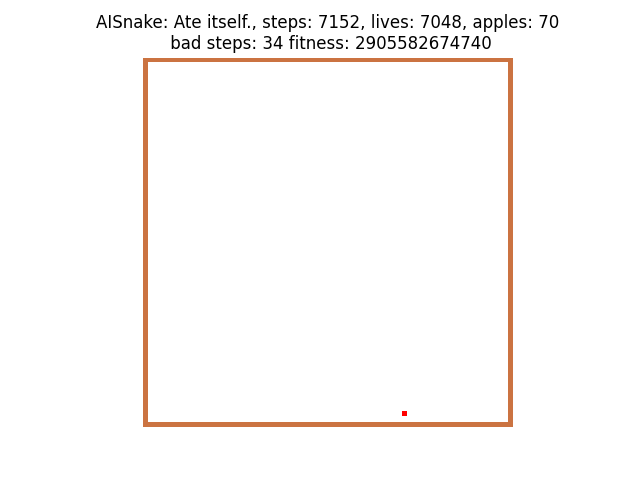

In [24]:
fig, ax = plt.subplots();
f = update_ai(ax);
anim = animation.FuncAnimation(fig, f, interval=1,blit=False);
plt.axis('off');
plt.show()

In [17]:
def draw_net(config, genome, view=False, filename=None, node_names=None, show_disabled=True, prune_unused=False,
             node_colors=None, fmt='svg'):
    """ Receives a genome and draws a neural network with arbitrary topology. From python-neat xor example"""
    # Attributes for network nodes.
    if graphviz is None:
        warnings.warn("This display is not available due to a missing optional dependency (graphviz)")
        return

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled', 'shape': 'box', 'fillcolor': node_colors.get(k, 'lightgray')}
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled', 'fillcolor': node_colors.get(k, 'lightblue')}

        dot.node(name, _attributes=node_attrs)

    if prune_unused:
        connections = set()
        for cg in genome.connections.values():
            if cg.enabled or show_disabled:
                connections.add((cg.in_node_id, cg.out_node_id))

        used_nodes = copy.copy(outputs)
        pending = copy.copy(outputs)
        while pending:
            new_pending = set()
            for a, b in connections:
                if b in pending and a not in used_nodes:
                    new_pending.add(a)
                    used_nodes.add(a)
            pending = new_pending
    else:
        used_nodes = set(genome.nodes.keys())

    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})

    dot.render(filename, view=view)

    return dot

In [18]:
names = {-1: 'front-first',
 -2: 'front-second',
 -3: 'front-has_apple',
 -4: 'right-first',
 -5: 'right-second',
 -6: 'right-has_apple',
 -7: 'left-first',
 -8: 'left-second',
 -9: 'left-has_apple',
 -10: 'apple_horizontal_rel',
 -11: 'apple_vertical_rel',
 -12: 'head_apple_distance',
}

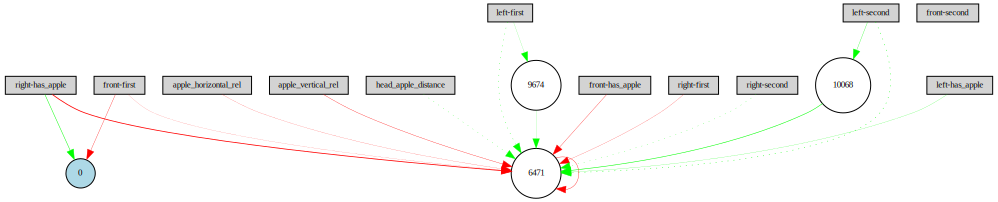

In [20]:
draw_net(config, winner, view=True, node_names=names)